<a href="https://colab.research.google.com/github/amansandhu408/deep-learning/blob/main/Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "concertriccir2.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "aryan495/concertriccir2",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3366261961.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 13.9k/13.9k [00:00<00:00, 22.5MB/s]

First 5 records:       X      Y  class
0  0.70 -0.247    0.0
1 -3.95  2.740    1.0
2  0.15 -2.160    1.0
3 -1.67 -0.942    1.0
4  2.56 -1.850    1.0


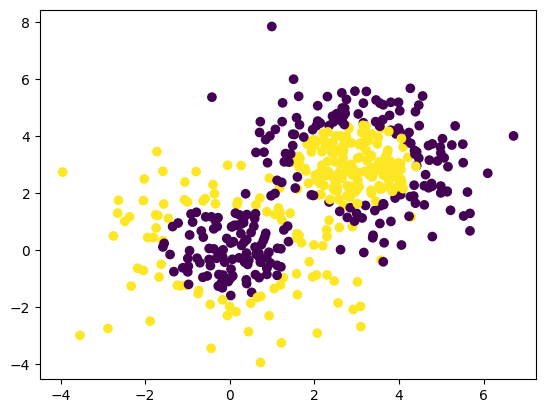

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [7]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5285 - loss: 0.6912 - val_accuracy: 0.4300 - val_loss: 0.6965
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5086 - loss: 0.6896 - val_accuracy: 0.4300 - val_loss: 0.6969
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4839 - loss: 0.6895 - val_accuracy: 0.4300 - val_loss: 0.6973
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4862 - loss: 0.6883 - val_accuracy: 0.4300 - val_loss: 0.6977
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5475 - loss: 0.6852 - val_accuracy: 0.4300 - val_loss: 0.6985
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5174 - loss: 0.6887 - val_accuracy: 0.4300 - val_loss: 0.6990
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5199 - loss: 0.6872 - val_accuracy: 0.4300 - val_loss: 0.6993
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5175 - loss: 0.6865 - val_accuracy: 0.4300 - 

In [9]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4806 - loss: 0.7428 - val_accuracy: 0.5600 - val_loss: 0.7284
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4715 - loss: 0.7159 - val_accuracy: 0.5600 - val_loss: 0.7132
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5138 - loss: 0.6992 - val_accuracy: 0.5700 - val_loss: 0.7087
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4845 - loss: 0.6983 - val_accuracy: 0.5900 - val_loss: 0.7040
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5305 - loss: 0.6667 - val_accuracy: 0.5700 - val_loss: 0.7020
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5103 - loss: 0.6773 - val_accuracy: 0.6000 - val_loss: 0.7004
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5565 - loss: 0.6655 - val_accuracy: 0.6000 - val_loss: 0.7009
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6235 - loss: 0.6347 - val_accuracy: 0.5700 - 

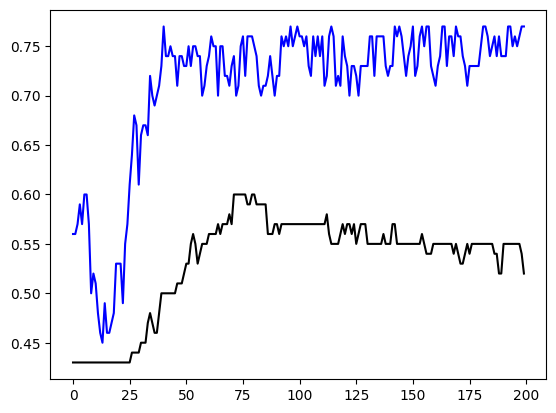

In [11]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='blue')